#### Import necessary modules

In [16]:
from scipy.spatial import distance
from PIL import Image
from skimage import feature
import numpy as np
import math
import os
import matplotlib.pyplot as plt
import matplotlib
import cv2 as cv
import time

In [9]:
!pip install --upgrade --no-cache-dir gdown

  Installing build dependencies ... done
  Getting requirements to build wheel ... done
    Preparing wheel metadata ... done
  Created wheel for gdown: filename=gdown-4.4.0-py3-none-any.whl size=14774 sha256=f095a8686251a7ea05b84483e9064e76acec8b2df8c2aa16630e72513a4295d5
  Stored in directory: /tmp/pip-ephem-wheel-cache-slcz2yaq/wheels/fb/c3/0e/c4d8ff8bfcb0461afff199471449f642179b74968c15b7a69c
Successfully built gdown
  Attempting uninstall: gdown
    Found existing installation: gdown 4.2.2
    Uninstalling gdown-4.2.2:
      Successfully uninstalled gdown-4.2.2


#### Download dataset

In [10]:
!gdown --id 1VdicuemXgiHdHute2S6xg2lgHpye4iZB
!unzip VizWiz.zip
!rm VizWiz.zip

Streaming output truncated to the last 5000 lines.
  inflating: txt/24199.txt           
  inflating: txt/24200.txt           
  inflating: txt/24201.txt           
  inflating: txt/24202.txt           
  inflating: txt/24203.txt           
  inflating: txt/24204.txt           
  inflating: txt/24205.txt           
  inflating: txt/24206.txt           
  inflating: txt/24207.txt           
  inflating: txt/24208.txt           
  inflating: txt/24209.txt           
  inflating: txt/24210.txt           
  inflating: txt/24211.txt           
  inflating: txt/24212.txt           
  inflating: txt/24213.txt           
  inflating: txt/24214.txt           
  inflating: txt/24215.txt           
  inflating: txt/24216.txt           
  inflating: txt/24217.txt           
  inflating: txt/24218.txt           
  inflating: txt/24219.txt           
  inflating: txt/24220.txt           
  inflating: txt/24221.txt           
  inflating: txt/24222.txt           
  inflating: txt/24223.txt           

We'll use color histogram and Hog features

In [11]:
def colorH2gram(pathfilename):
  img = cv.imread(pathfilename,cv.IMREAD_COLOR)
  img = cv.cvtColor(img,cv.COLOR_BGR2HSV)
  H, S, V = img[:,:,0], img[:,:,1], img[:,:,2]
  hist_h = cv.calcHist([H],[0],None,[256],[0,256])
  hist_s = cv.calcHist([S],[0],None,[256],[0,256])
  hist_v = cv.calcHist([V],[0],None,[256],[0,256])
  features = np.concatenate([hist_h,hist_s,hist_v])
  return features

def HoG(path_img):
    img = cv.imread(path_img)
    img = cv.resize(img, (75, 100))
    (hog, hog_image) = feature.hog(img, orientations=9, pixels_per_cell=(8, 8),
                                   cells_per_block=(2, 2), block_norm='L2-Hys',
                                   visualize=True, transform_sqrt=True)
    return hog

def processing(path, query_h2g ,mode = 0): # 0: h2g | 1: HoG
  results = []
  
  for item in os.listdir(path):
    if item == path.split('/')[-1]: # Remove query image
      continue
    print(f'Processing {item}')
    if mode == 0:
      data_h2g = colorH2gram(os.path.join(path,item))
    elif mode == 1:
      data_h2g = HoG(os.path.join(path,item))
    dist = 1 - distance.cosine(query_h2g, data_h2g)
    # dist = np.linalg.norm(data_h2g-query_h2g)
    results.append([os.path.join(path,item), dist])

  results = np.array(results)
  return results

#### Query (using Color Histogram features)

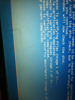

In [12]:
img_query = '/content/img/23455.png'
Image.open(img_query)

In [13]:
path = '/content/img'
start = time.time()
query_h2g = colorH2gram(img_query)
results = processing(path,query_h2g ,0)
print(f'Time used: {time.time()-start}s')

Streaming output truncated to the last 5000 lines.
Processing 30629.png
Processing 29050.png
Processing 27216.png
Processing 26440.png
Processing 29413.png
Processing 31024.png
Processing 24693.png
Processing 24047.png
Processing 23682.png
Processing 23598.png
Processing 27759.png
Processing 23833.png
Processing 23611.png
Processing 24012.png
Processing 29679.png
Processing 25024.png
Processing 28460.png
Processing 30548.png
Processing 23812.png
Processing 24878.png
Processing 29809.png
Processing 24936.png
Processing 26009.png
Processing 27878.png
Processing 26371.png
Processing 25160.png
Processing 27857.png
Processing 30561.png
Processing 27632.png
Processing 30710.png
Processing 23460.png
Processing 28898.png
Processing 26959.png
Processing 27612.png
Processing 23906.png
Processing 23885.png
Processing 30071.png
Processing 27102.png
Processing 26606.png
Processing 26072.png
Processing 24032.png
Processing 28863.png
Processing 26673.png
Processing 30822.png
Processing 27499.png
Proc

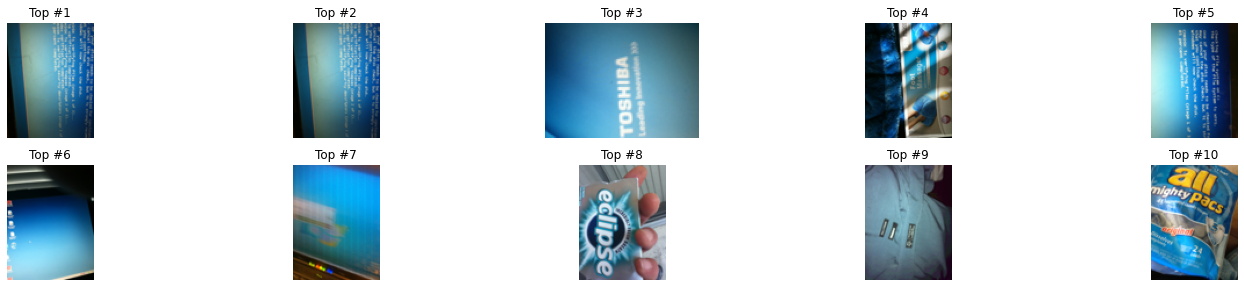

In [14]:
K = 10 # Return top K image same as query image 
results = sorted(results, key=lambda x: x[1],reverse=True)

axes = []
grid_size = int(math.sqrt(K))
fig = plt.figure(figsize=(20,10))


for id in range(K):
    draw_image = results[id]
    axes.append(fig.add_subplot(5, 5, id+1))
    # axes[-1].set_title(draw_image[0].split('/')[-1] + f' ({draw_image[1]})')
    axes[-1].set_title(f'Top #{id+1}')
    plt.axis('off')
    plt.imshow(Image.open(draw_image[0]))

fig.tight_layout()
plt.show()

#### Query (Using HoG features)

In [17]:
query_h2g = HoG(img_query)

In [18]:
path = '/content/img'
start= time.time()
query_h2g = HoG(img_query)
results = processing(path,query_h2g ,1)
print(f'Time used: {time.time()-start}s')

Streaming output truncated to the last 5000 lines.
Processing 30629.png
Processing 29050.png
Processing 27216.png
Processing 26440.png
Processing 29413.png
Processing 31024.png
Processing 24693.png
Processing 24047.png
Processing 23682.png
Processing 23598.png
Processing 27759.png
Processing 23833.png
Processing 23611.png
Processing 24012.png
Processing 29679.png
Processing 25024.png
Processing 28460.png
Processing 30548.png
Processing 23812.png
Processing 24878.png
Processing 29809.png
Processing 24936.png
Processing 26009.png
Processing 27878.png
Processing 26371.png
Processing 25160.png
Processing 27857.png
Processing 30561.png
Processing 27632.png
Processing 30710.png
Processing 23460.png
Processing 28898.png
Processing 26959.png
Processing 27612.png
Processing 23906.png
Processing 23885.png
Processing 30071.png
Processing 27102.png
Processing 26606.png
Processing 26072.png
Processing 24032.png
Processing 28863.png
Processing 26673.png
Processing 30822.png
Processing 27499.png
Proc

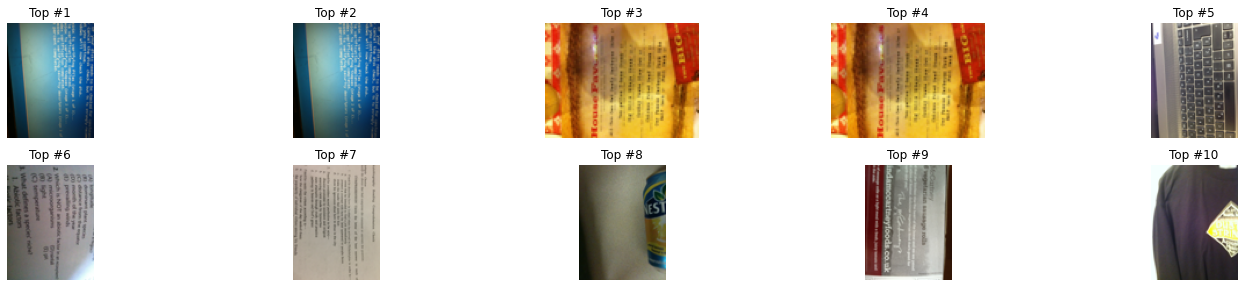

In [19]:
K = 10 # Return top K image same as query image 
# results = results[np.argsort(results[:, 1])] # Desending distance
results = sorted(results, key=lambda x: x[1], reverse=True)

axes = []
grid_size = int(math.sqrt(K))
fig = plt.figure(figsize=(20,10))

for id in range(K):
    draw_image = results[id]
    axes.append(fig.add_subplot(5, 5, id+1))
    # axes[-1].set_title(draw_image[0].split('/')[-1] + f' ({draw_image[1]})')
    axes[-1].set_title(f'Top #{id+1}')
    plt.axis('off')
    plt.imshow(Image.open(draw_image[0]))

fig.tight_layout()
plt.show()